In [5]:
pip install --upgrade threadpoolctl scikit-learn


  Obtaining dependency information for threadpoolctl from https://files.pythonhosted.org/packages/32/d5/f9a850d79b0851d1d4ef6456097579a9005b31fea68726a4ae5f2d82ddd9/threadpoolctl-3.6.0-py3-none-any.whl.metadata
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/b2/3b/47b5eaee01ef2b5a80ba3f7f6ecf79587cb458690857d4777bfd77371c6f/scikit_learn-1.7.1-cp311-cp311-win_amd64.whl.metadata
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
   ---------------------------------------- 0.0/8.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.9 MB 320.0 kB/s eta 0:00:28
   ---------------------------------------- 0.0/8.9 MB 325.1 kB/s eta 0:00:28
   ---------------------------------------- 0.1/8.9 MB 465.5 kB/s eta 0:00:20
    --------------------------------------- 0.1/8.9 MB 798.9 kB/s eta 0:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Load reduced dataset
df = pd.read_csv("../data/heart_disease_selected_features.csv")

# Separate features and target
X = df.drop(columns=["num"])   # features
y = df["num"]
y_bin = (y > 0).astype(int)    # binary labels for comparison


In [2]:
import os
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["OPENBLAS_NUM_THREADS"] = "1"
os.environ["MKL_NUM_THREADS"] = "1"


C:\Users\Eman\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1408: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.
  warnings.warn(
C:\Users\Eman\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


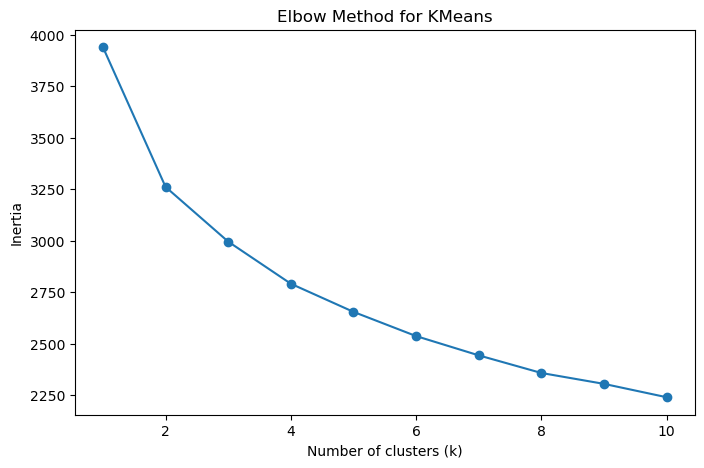

In [3]:
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, algorithm="elkan")
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker="o")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for KMeans")
plt.show()


In [8]:
# Choose k=2 (healthy vs diseased), adjust if needed
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters_kmeans = kmeans.fit_predict(X)

# Add cluster labels to dataframe
df["KMeans_Cluster"] = clusters_kmeans

print(df[["num", "KMeans_Cluster"]].head())


   num  KMeans_Cluster
0    0               2
1    2               2
2    1               2
3    0               1
4    0               1


C:\Users\Eman\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Adjusted Rand Index (KMeans vs true labels): 0.2809714204056543


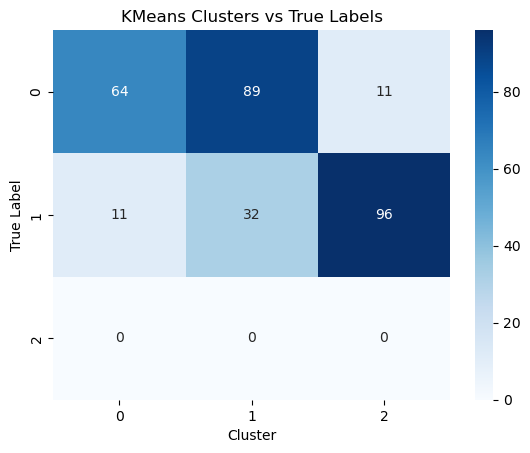

In [9]:
from sklearn.metrics import adjusted_rand_score, confusion_matrix

ari = adjusted_rand_score(y_bin, clusters_kmeans)
print("Adjusted Rand Index (KMeans vs true labels):", ari)

cm = confusion_matrix(y_bin, clusters_kmeans)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Cluster")
plt.ylabel("True Label")
plt.title("KMeans Clusters vs True Labels")
plt.show()


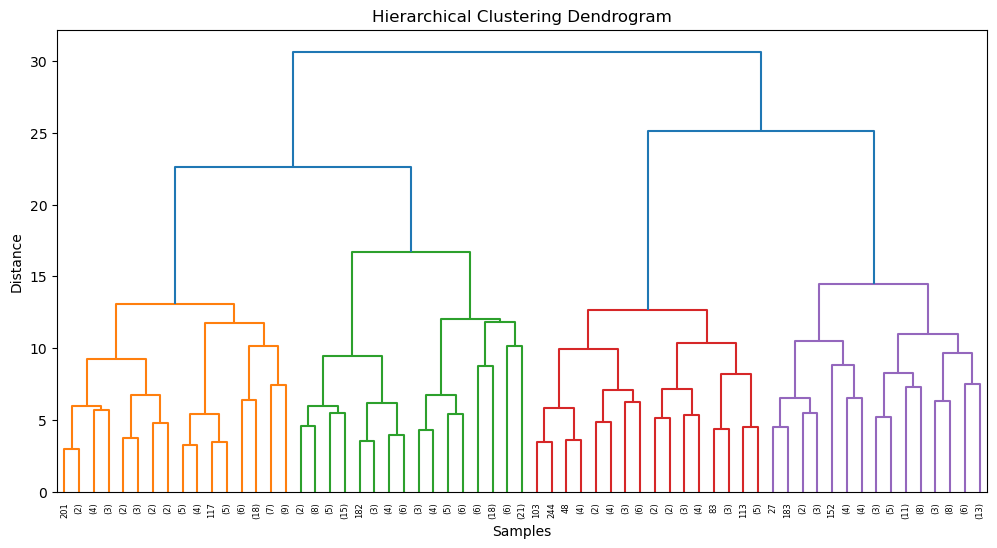

In [10]:
# Hierarchical clustering using Ward's method
Z = linkage(X, method="ward")

plt.figure(figsize=(12,6))
dendrogram(Z, truncate_mode="level", p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()


Adjusted Rand Index (Hierarchical vs true labels): 0.146129913123814


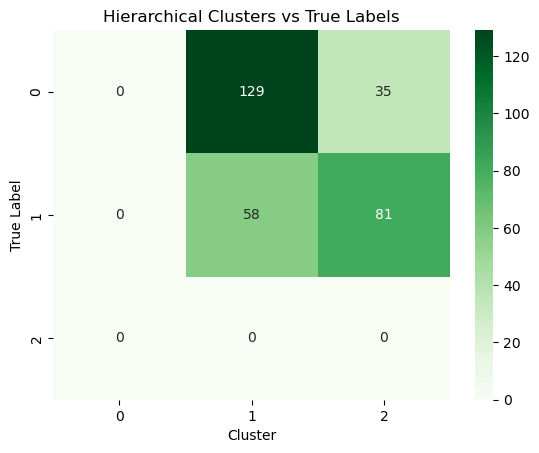

In [11]:
clusters_hc = fcluster(Z, t=2, criterion="maxclust")  # force 2 clusters
df["HierCluster"] = clusters_hc

ari_hc = adjusted_rand_score(y_bin, clusters_hc)
print("Adjusted Rand Index (Hierarchical vs true labels):", ari_hc)

cm_hc = confusion_matrix(y_bin, clusters_hc)
sns.heatmap(cm_hc, annot=True, fmt="d", cmap="Greens")
plt.xlabel("Cluster")
plt.ylabel("True Label")
plt.title("Hierarchical Clusters vs True Labels")
plt.show()
